# Analysis notebook: `alpha_CRY_offspill-LH_as`  

## Define analysis name

In [1]:
ana_label = "alpha_CRY_offspill-LH_as"

## Preamble

In [2]:
from preamble import *

## Load data

In [3]:
!ls ../../output/results/alpha_CRY_offspill-LH_as

alpha_CRY_offspill-LH_as.log   efficiency.csv  info.txt
alpha_CRY_offspill-LH_as.yaml  events.parquet  results.pkl
cut_flow.csv		       hists.h5        stats.csv


In [4]:
loader = Load(
    in_path = f"../../output/results/{ana_label}"
)

[Load] ✅ Initialised with out_path=../../output/results/alpha_CRY_offspill-LH_as


In [5]:
results = loader.load_pkl() 
results_from_persistent = loader.load_all() # Persistent backup 

[Load] ✅ Successfully loaded results from ../../output/results/alpha_CRY_offspill-LH_as/results.pkl
[Load] ✅ Loaded cut stats from ../../output/results/alpha_CRY_offspill-LH_as/cut_flow.csv
[Load] ✅ Loaded histograms from ../../output/results/alpha_CRY_offspill-LH_as/hists.h5
[Load] ✅ Loaded efficiency info from ../../output/results/alpha_CRY_offspill-LH_as/efficiency.csv
[Load] ✅ Successfully loaded ak.Array from ../../output/results/alpha_CRY_offspill-LH_as/events.parquet
[Load] ✅ Loaded info from ../../output/results/alpha_CRY_offspill-LH_as/info.txt


## Analyse results

### Cut flow

In [13]:
display(results["cut_flow"].round(2))

,Cut,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,5754129,100.00,100.00,No selection applied
1,is_reco_electron,5351815,93.01,93.01,Electron track fits
2,has_trk_front,5246599,91.18,98.03,Tracks intersect tracker entrance
3,good_trkqual,985883,17.13,18.79,Track fit quality > 0.8
4,is_downstream,675042,11.73,68.47,Downstream tracks (p_z > 0 at tracker entrance)
5,has_hits,673612,11.71,99.79,>20 active tracker hits
6,within_d0,133000,2.31,19.74,Distance of closest approach (d_0 < 100 mm)
7,within_pitch_angle,69885,1.21,52.55,Extrapolated pitch angle (0.557735 < tan(theta...
8,within_lhr_max,55915,0.97,80.01,Loop helix maximum radius (450 < R_max < 680 mm)
9,is_truth_electron,35469,0.62,63.43,Track parents are electrons (truth PID)


### Histograms

In [7]:
draw = Draw()

# Define image directory
img_dir = f"../../output/images/{ana_label}"
os.makedirs(img_dir, exist_ok=True)

[Plot] ⭐️ Initialised


[Plot] ✅ 	Wrote ../../output/images/alpha_CRY_offspill-LH_as/h1o_1x3_mom_windows.png


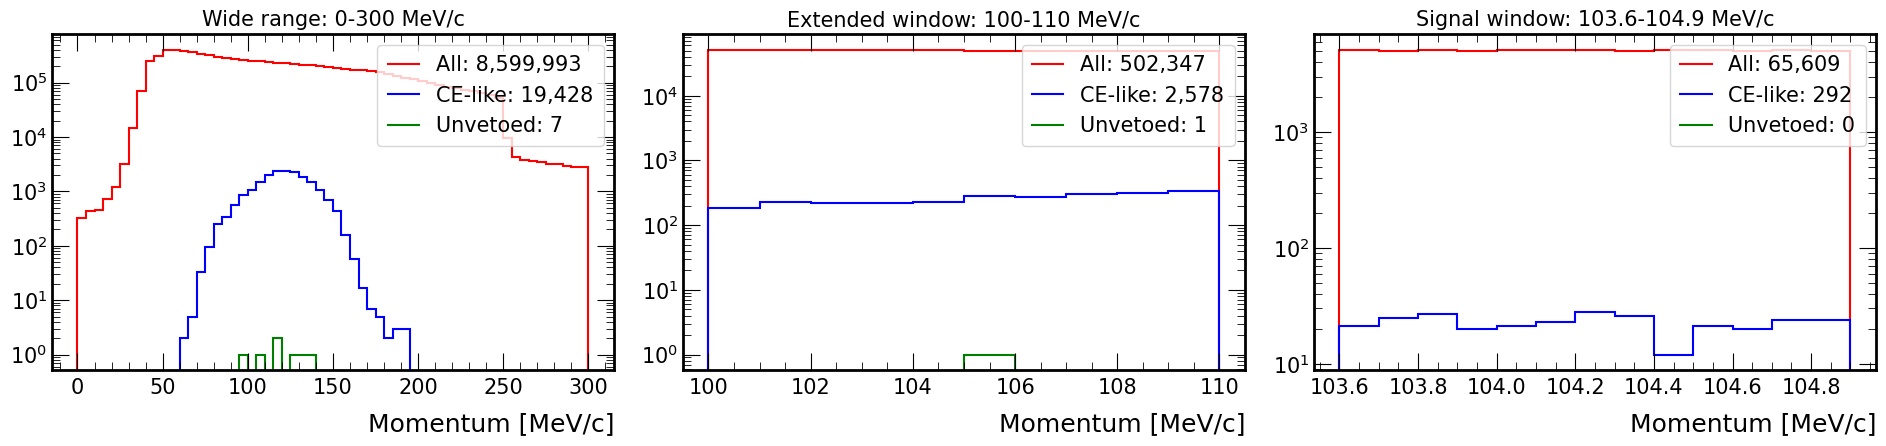

In [8]:
draw.plot_mom_windows(results["hists"], out_path=f"{img_dir}/h1o_1x3_mom_windows.png") 

[Plot] ✅ 	Wrote ../../output/images/alpha_CRY_offspill-LH_as/h1o_crv_zwindows.png


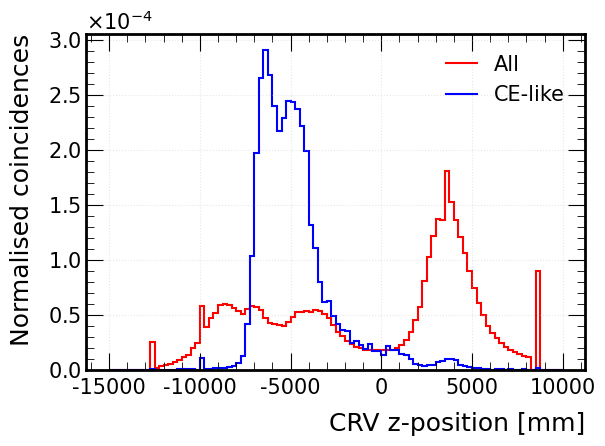

In [9]:
draw.plot_crv_z(results["hists"], out_path=f"{img_dir}/h1o_crv_zwindows.png") 

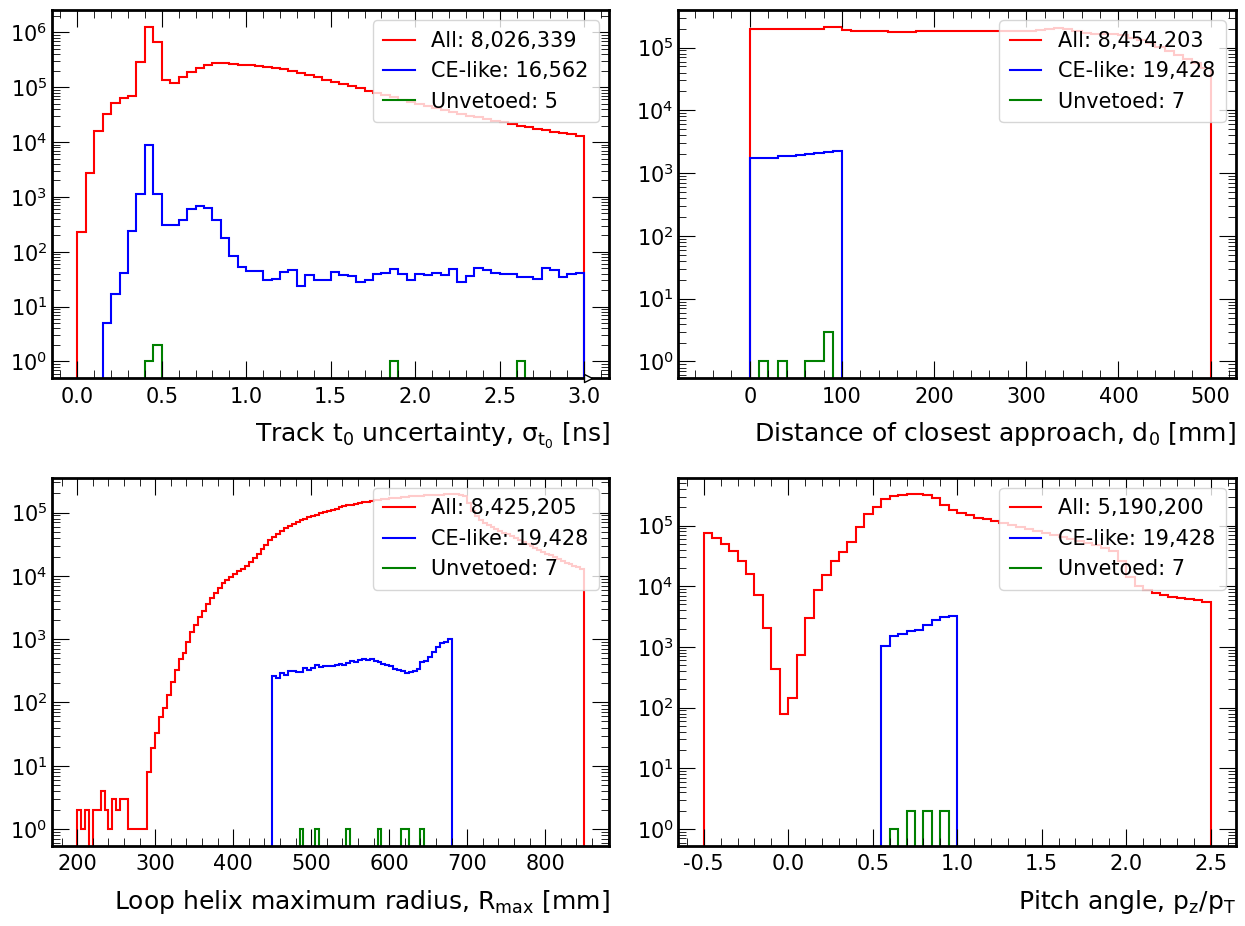

In [15]:
draw.plot_trkfit_params(results["hists"])

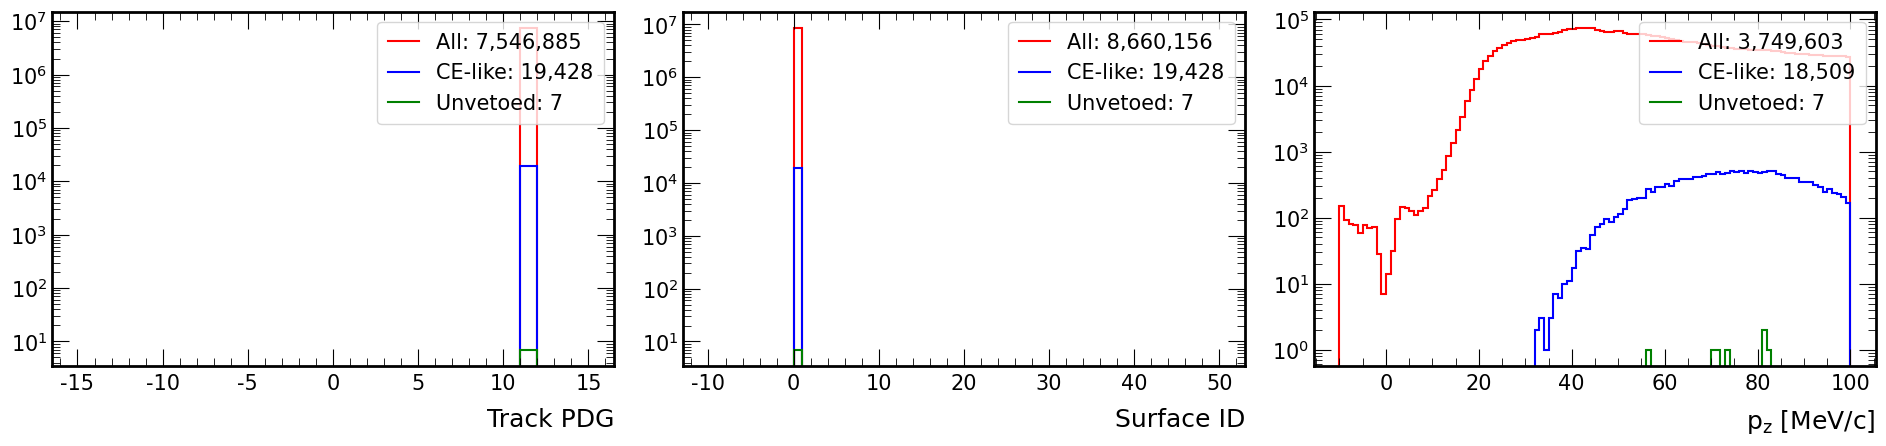

In [14]:
draw.plot_sanity(results["hists"])

### Efficiency 

In [10]:
display(results["efficiency"])

,Type,Events Passing (k),Total Events (N),Efficiency [%],Efficiency Error [%]
0,Signal (wide),19428,4000000,0.49,0.00
1,Signal (ext),2578,4000000,0.06,0.00
2,Signal (sig),292,4000000,0.01,0.00
3,Veto (wide),7,19428,99.96,0.01
4,Veto (ext),1,2578,99.96,0.04
5,Veto (sig),0,292,100.00,0.17


### Background event info

In [11]:
print(results["event_info"])

  Index:            9
  Subrun:           [4846]
  Event:            [283585]
  File:             nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.001202_00000075.root
  Track time [ns]:  59076.573926
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------
  Index:            172
  Subrun:           [19742]
  Event:            [359830]
  File:             nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.001202_00015581.root
  Track time [ns]:  31331.604162
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------
  Index:            206
  Subrun:           [18802]
  Event:            [50292]
  File:             nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.001202_00015287.root
  Track time [ns]:  86861.975560
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------
  Index:            269
  Subrun:  

In [12]:
from pyutils.pyprint import Print
printer = Print()
printer.print_n_events(results["events"], n_events=len(results["events"]))

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[pyprint] ⭐️ Printing 7 event(s)...

-------------------------------------------------------------------------------------
evt.run: 1202
evt.subrun: 4846
evt.event: 283585
crv.crvcoincs.time: []
crv.crvcoincs.nHits: []
crv.crvcoincs.pos.fCoordinates.fZ: []
is_reco_electron: [True, False, False, False]
at_trk_front: [[False, False, False, False, False, False, True, False, False], ..., [...]]
has_trk_front: [True, True, True, True]
good_trkqual: [True, False, True, False]
is_downstream: [True, False, True, False]
has_hits: [True, True, True, True]
within_d0: [True, True, True, True]
within_pitch_angle: [True, False, True, False]
within_lhr_max: [True, False, True, False]
is_truth_electron: [True, True, True, True]
one_reco_electron: [True, True, True, True]
one_reco_electron_per_event: True
unvetoed: [True, True, True, True]
within_ext_win: [False, False, False, False]
within_sig_win: [False, False, False, False]
CE_li